In [1]:
from osgeo import gdal
import affine
import numpy as np
import sys
import os

import context
import pymagery

import affine


init raster


In [2]:
gdal.UseExceptions()

raster_path = context.imagery_paths[0]
src_ds = gdal.Open(raster_path )

n_bands = src_ds.RasterCount

src_band = src_ds.GetRasterBand(1)
arr = src_band.ReadAsArray()


In [10]:
src_ds.GetProjectionRef()


'PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"]]'

In [14]:
c, a, b, f, d, e = src_ds.GetGeoTransform()

In [4]:
crs = 'epsg:26911'
aff = np.array([1])
bands = np.zeros([3, 5, 6])
raster = pymagery.Raster()
sb = pymagery.SingleBand()
mb = pymagery.MultiBand()

AttributeError: 'NoneType' object has no attribute 'values'

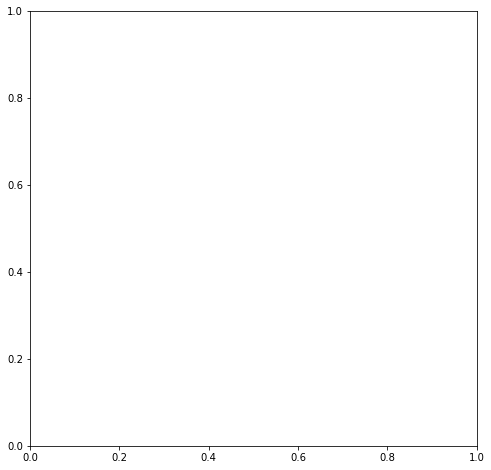

In [5]:
fig, ax = sb.plot()
mb.plot()

In [ ]:
sb = pymagery.Raster.from_path(context.dem_paths[0])
sb.plot()

In [ ]:
mb = pymagery.Raster.from_path(context.imagery_paths[3])
mb

In [ ]:
path = context.imagery_paths[3]

In [ ]:
mb.bands

In [ ]:
src_ds.RasterCount

In [ ]:
src_ds.GetProjection()

In [ ]:

bands = src_ds.ReadAsArray()

In [ ]:
import rasterio as rio

In [ ]:
rio_raster = rio.open(path)
raster = rio_raster.read_masks()

In [ ]:
raster = rio_raster.read_transform

In [ ]:
bands = rio_raster.read()
n_bands, N, M = bands.shape
im = np.stack(bands[:3], axis=2)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(im)

In [ ]:
d = {'a': 1, 'b': 2}
vals = d.values()

In [ ]:
list(vals)[0]

In [ ]:
import numpy as np
class Bands(dict):
    
    def __getitem__(self, i):
        if type(i) in (int, np.int64):
            return list(self.values())[i]
        if type(i) is slice:
            sl = i
            print(sl)
            idx = np.arange(*(x for x in (sl.start, sl.stop, sl.step) if x))
            print(idx)
            return np.array([self[i] for i in idx if i < len(self)])
        print(i, type(i))
        return super().__getitem__(i)

In [ ]:
bands = Bands({'a': 1, 'b': 2, 'c': 3})
bands['a'], bands[0], bands[1], bands['b'],

In [ ]:
bands[:4]

In [ ]:
sl = slice(0, 3)
np.arange(sl.start, sl.stop, sl.step)

## thinking about Bands class

# can you just define __next__?